In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager, rc
font = 'Arial'
plt.rcParams['font.family'] = font
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.inspection import permutation_importance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE

from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# Reading the input data
data_C=data= pd.read_csv('total_data.csv')

In [20]:
for i in data_C.columns[2:data_C.shape[1]+1]:
    data_C[i]=data_C[i].astype('float')

In [21]:
data_C.columns

Index(['level_0', 'Time', 'Year', 'Week', 'Month', 'Rate',
       'Average temperature', 'Minimum temperature', 'Maximum temperature',
       'Rainfall', 'Minimum humidity', 'Relative humidity', 'Day length',
       'Duration of sunshine', 'Soil temperature at 3m',
       'Soil temperature at 5m', 'Number of Daycare center',
       'Population of Daycare center', 'outbreak', 'warning', 'peak',
       'warning3', 'warning2', 'season', 'Last norovirus detection late',
       'th'],
      dtype='object')

In [22]:
variables=['Week','Minimum temperature','Rainfall', 'Relative humidity', 'Day length',
       'Soil temperature at 3m',
       'Soil temperature at 5m','Last norovirus detection late']
targets=['warning']

In [23]:
data_train=data_C[(data_C['Year']>=2009)&(data_C['Year']<2017)]
data_train.index=range(len(data_train))

In [24]:
data_test=data_C[data_C['Year']>=2017]
data_test.index=range(len(data_test))

In [25]:
targets=['warning']

In [31]:
data_FS_X=data_train[variables]
data_FS_X_copy=data_FS_X.copy()

In [32]:
data_FS_Y=data_train[targets]
data_FS_Y_copy=data_FS_Y.copy()

In [40]:
data_test_X=data_test[variables]
data_test_Y=data_test[targets]

data_test_X_copy=data_test_X.copy()
data_test_Y_copy=data_test_Y.copy()


In [41]:
scaler = MinMaxScaler()

data_FS_X = scaler.fit_transform(data_FS_X)
data_test_X = scaler.fit_transform(data_test_X)

data_FS_X = pd.DataFrame(data_FS_X)
data_test_X = pd.DataFrame(data_test_X)

data_FS_X.columns = variables
data_test_X.columns = variables

In [42]:
data_FS_X=data_FS_X[variables]
data_test_X=data_test_X[variables]

In [43]:
FI_RF=pd.DataFrame(columns={'Feature'})
FI_RF['Feature']=data_FS_X.columns

FI_GB=pd.DataFrame(columns={'Feature'})
FI_GB['Feature']=data_FS_X.columns

# RF

In [45]:
max_depth_1=10
max_features_1=0.5
max_leaf_nodes_1=5
learning_rate_1=0.04
n_estimators_1=20

n_hidden_nodes=20
alpha=0.3

fit_num=1000

tree_num=4
for i in range(fit_num):

    RF_clf = RandomForestClassifier(n_estimators = n_estimators_1,
                                          max_depth = max_depth_1,
                                          max_features = max_features_1,
                                          max_leaf_nodes = max_leaf_nodes_1)
    RF_clf.fit(data_FS_X, data_FS_Y)
    y_predict=RF_clf.predict(data_test_X)
    feature_importance = RF_clf.feature_importances_
    
    temp=pd.DataFrame(columns={'Feature'})
    temp['Feature']=data_FS_X.columns
    temp['Feature Importance']=feature_importance 
    
    
    FI_RF['Simulation_'+ str(i)]=feature_importance

In [26]:
FI_RF.to_excel('Feature_Importance_RF.xlsx',index=None)

In [27]:
FI_RF=pd.read_excel('Feature_Importance_RF.xlsx')

In [28]:
for i in range(len(FI_RF)):
    FI_RF.loc[i,'mean']=FI_RF.loc[i,FI_RF.columns[1:]].mean()

In [29]:
FI_RF['mean'] # RF

0    0.036633
1    0.244470
2    0.001885
3    0.024320
4    0.110143
5    0.013610
6    0.012753
7    0.556185
Name: mean, dtype: float64

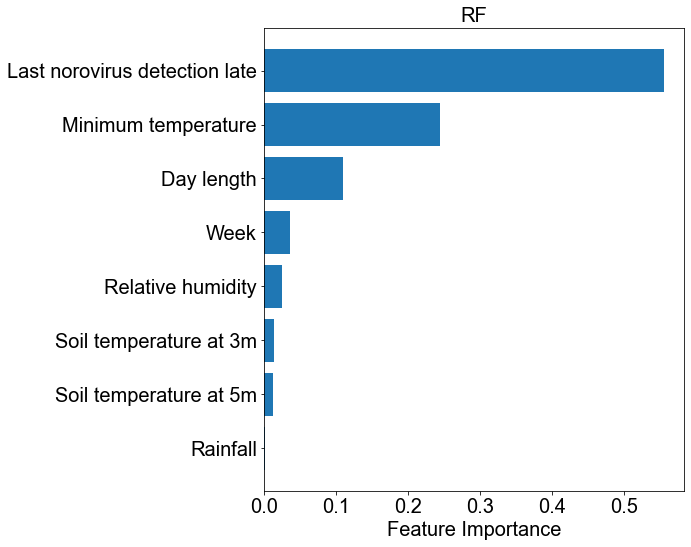

In [37]:
plt.figure(figsize=(10,8))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
font2 = {'family': 'Arial','color':'k','weight': 'bold','size': 30}
for j in range(2):
#     plt.subplot(2,1,1)
    if (j==0):
        feature_importance=FI_RF['mean']
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(data_FS_X.columns)[sorted_idx])
#         plt.xlim([0, 0.35])
        plt.xlabel('Feature Importance')
        plt.rc('axes', titlesize=20)
        plt.title('RF')
#         plt.text(-0.15, 8, 'A', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'

plt.tight_layout()
plt.savefig('FI_RF.tiff', dpi=300,facecolor='white',bbox_inches='tight')
plt.show()

# GB

In [47]:
max_depth_1=10
max_features_1=0.5
max_leaf_nodes_1=5
learning_rate_1=0.04
n_estimators_1=20

n_hidden_nodes=20
alpha=0.3

fit_num=1000

tree_num=4
for i in range(fit_num):
    
    GB_clf = GradientBoostingClassifier(n_estimators = n_estimators_1,
                                          learning_rate = learning_rate_1,
                                          subsample = 0.9,
                                          max_depth = max_depth_1,
                                          max_features = max_features_1,
                                          max_leaf_nodes = max_leaf_nodes_1)
    GB_clf.fit(data_FS_X, data_FS_Y)
    y_predict = GB_clf.predict(data_test_X)
    feature_importance = GB_clf.feature_importances_
    
    temp=pd.DataFrame(columns={'Feature'})
    temp['Feature']=data_FS_X.columns
    temp['Feature Importance']=feature_importance 
    
    
    FI_GB['Simulation_'+ str(i)]=feature_importance

In [39]:
FI_GB.to_excel('Feature_Importance_gb.xlsx',index=None)

In [40]:
FI_GB=pd.read_excel('Feature_Importance_gb.xlsx')

In [41]:
for i in range(len(FI_GB)):
    FI_GB.loc[i,'mean']=FI_GB.loc[i,FI_GB.columns[1:]].mean()

In [43]:
feature_importance[sorted_idx]

array([0.        , 0.02122067, 0.01156565, 0.01164665, 0.05060443,
       0.09923395, 0.33811322, 0.46761543])

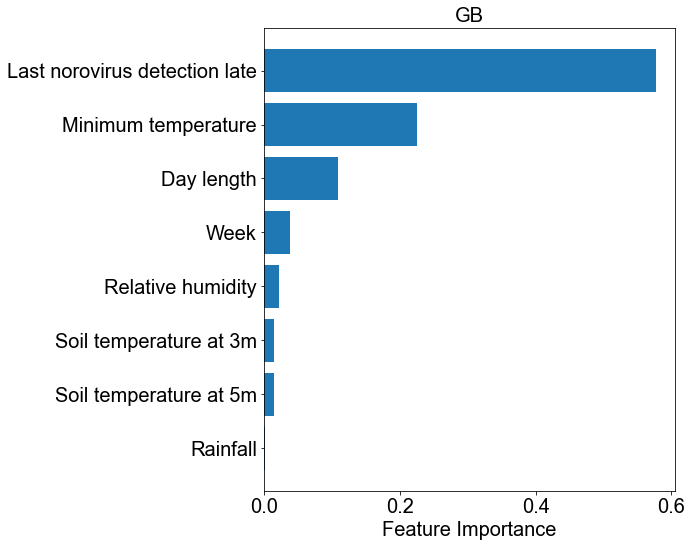

In [44]:
plt.figure(figsize=(10,8))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
font2 = {'family': 'Arial','color':'k','weight': 'bold','size': 30}
for j in range(2):
#     plt.subplot(2,1,1)
    if (j==0):
        feature_importance=FI_GB['mean']
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(data_FS_X.columns)[sorted_idx])
#         plt.xlim([0, 0.35])
        plt.xlabel('Feature Importance')
        plt.rc('axes', titlesize=20)
        plt.title('GB')
#         plt.text(-0.15, 8, 'A', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'

plt.tight_layout()
plt.savefig('FI_GB.tiff', dpi=300,facecolor='white',bbox_inches='tight')
plt.show()